In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re
import json
import ast
from matplotlib.ticker import FuncFormatter
import glob
from matplotlib import animation
from scipy.spatial.distance import pdist, squareform
from itertools import combinations
import scipy
from scipy.stats import entropy
from sklearn import manifold
from adjustText import adjust_text
from mpl_toolkits import mplot3d
import networkx as nx
from scipy.spatial import distance

In [2]:
animes = pd.read_csv('anime_cleaned.csv')
animes = animes.rename(columns={'genre': 'genres', 'studio': 'studios'})
animes = animes.set_index('anime_id')


In [3]:
animes_all = pd.read_csv('anime_filtered.csv')
animes_all = animes_all.rename(columns={'genre': 'genres', 'studio': 'studios'})
animes_all = animes_all.set_index('anime_id')
# calculating year which is already calculated for cleaned data
animes_all['aired_from_year'] = pd.to_datetime(animes['aired'].apply(lambda x: ast.literal_eval(x.replace('\'', '"'))['from']), errors='coerce').dt.year
years_from_string = animes_all['aired_string'].str.extract(r'(\d{4})')
animes_all.loc[animes_all['aired_from_year'].isnull(), 'aired_from_year'] = years_from_string[animes_all['aired_from_year'].isnull()]

/home.stud/racinmat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


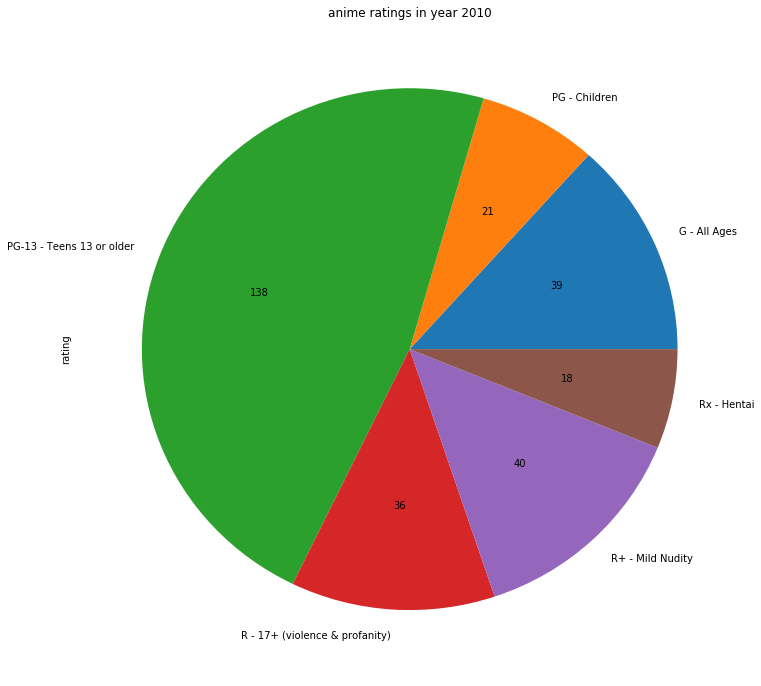

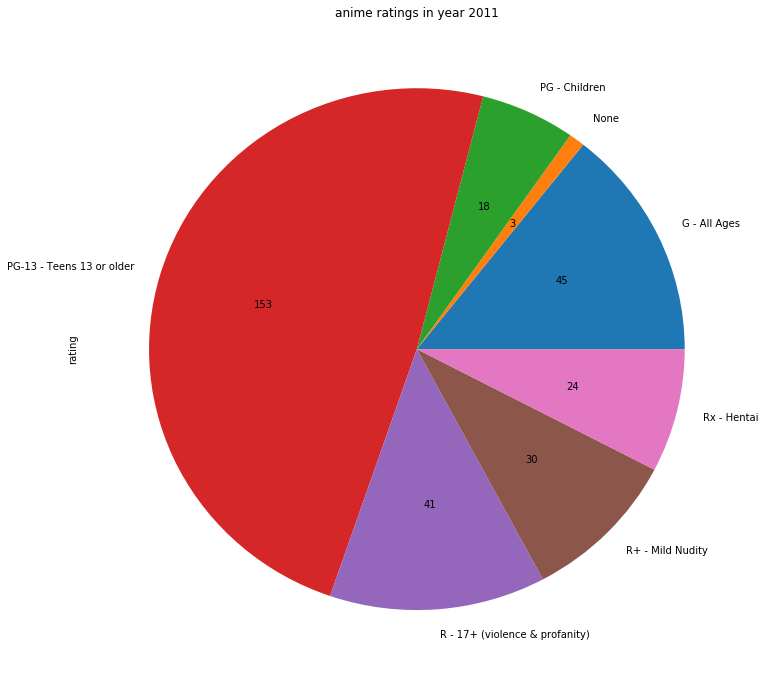

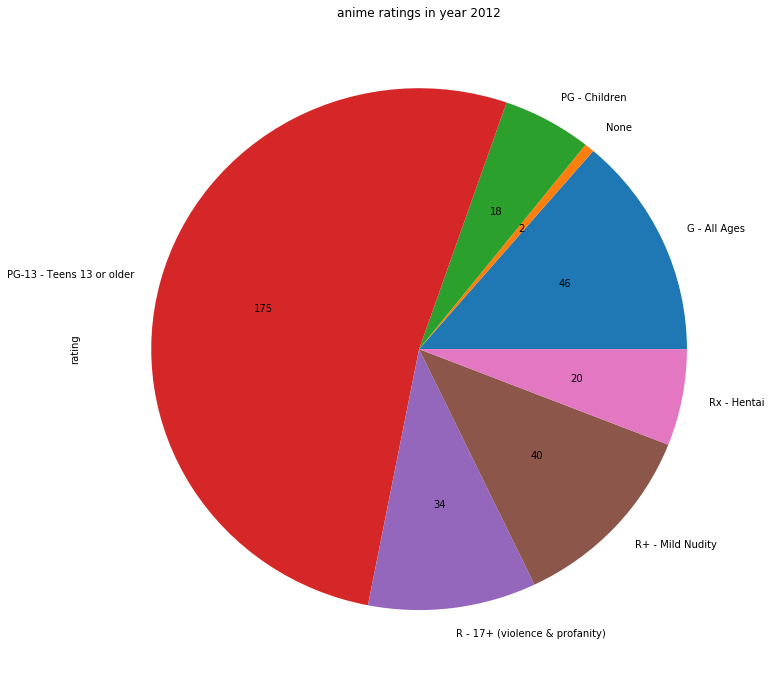

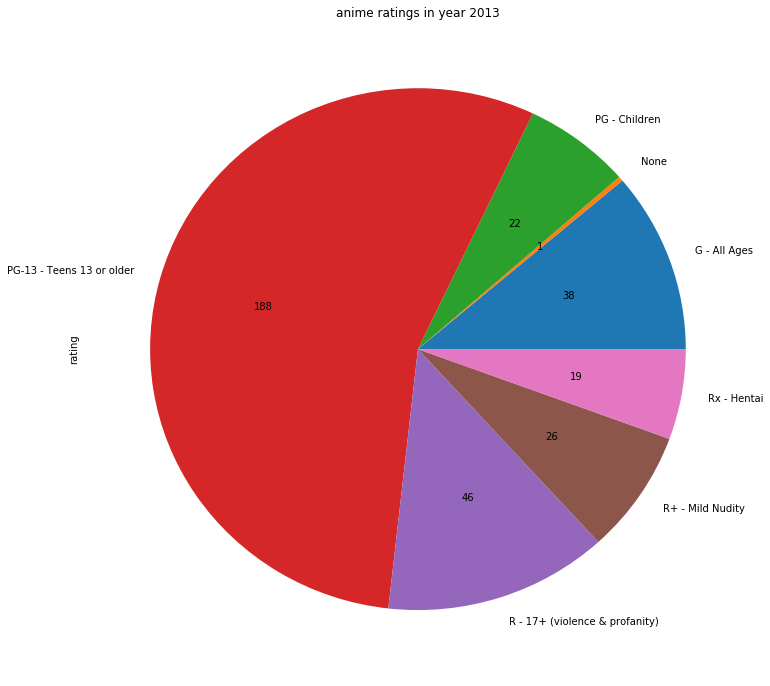

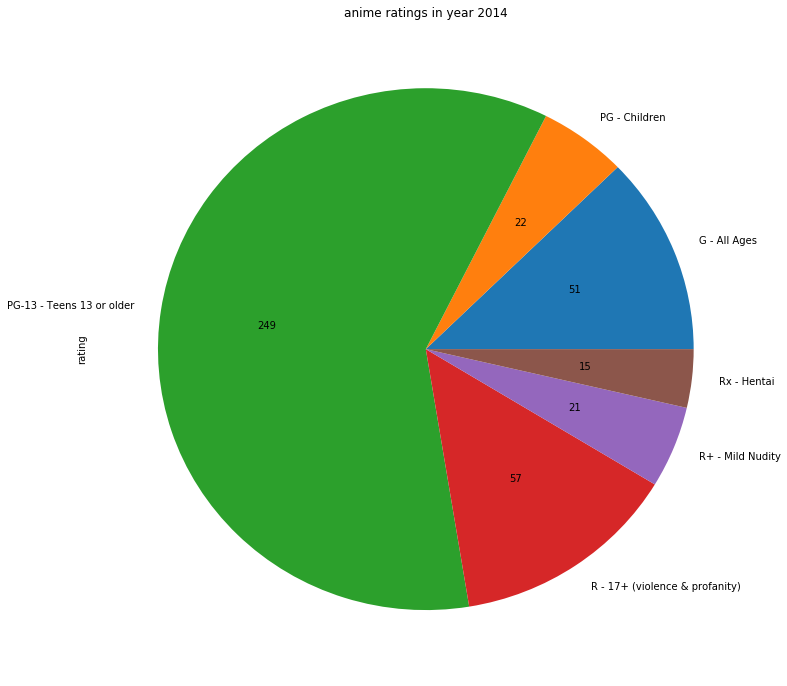

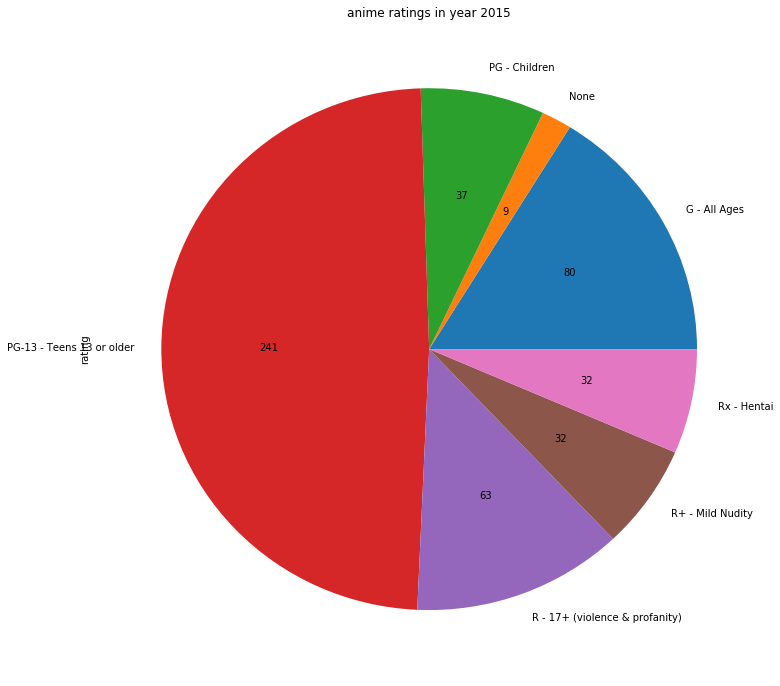

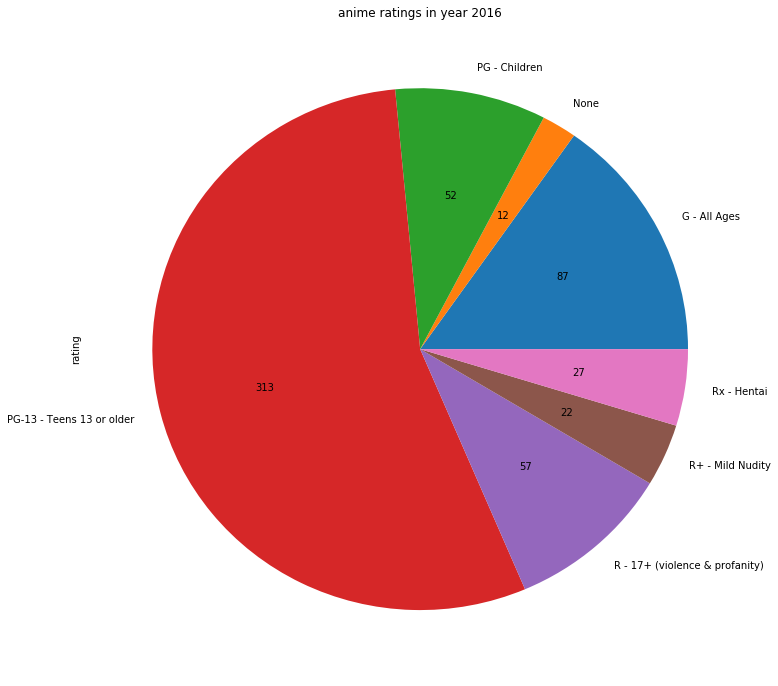

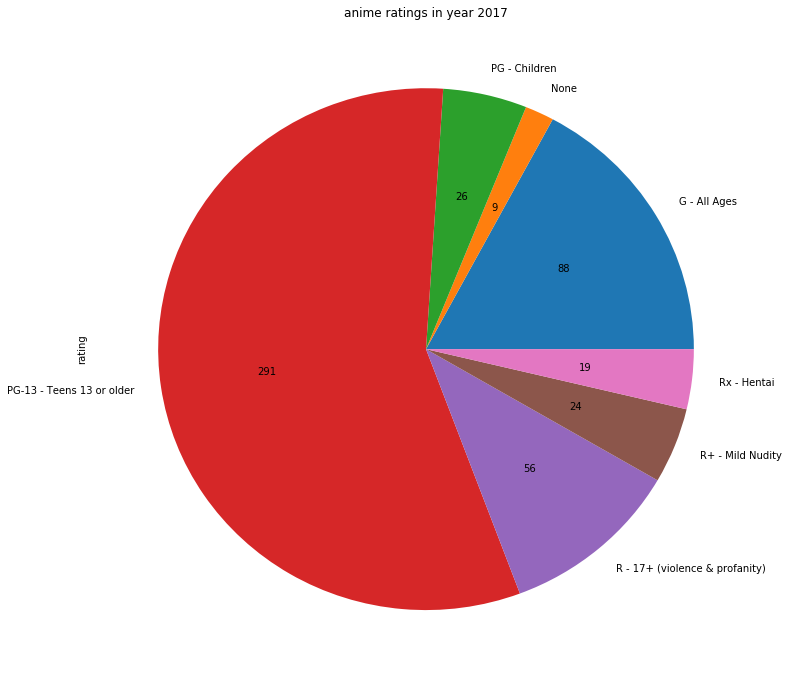

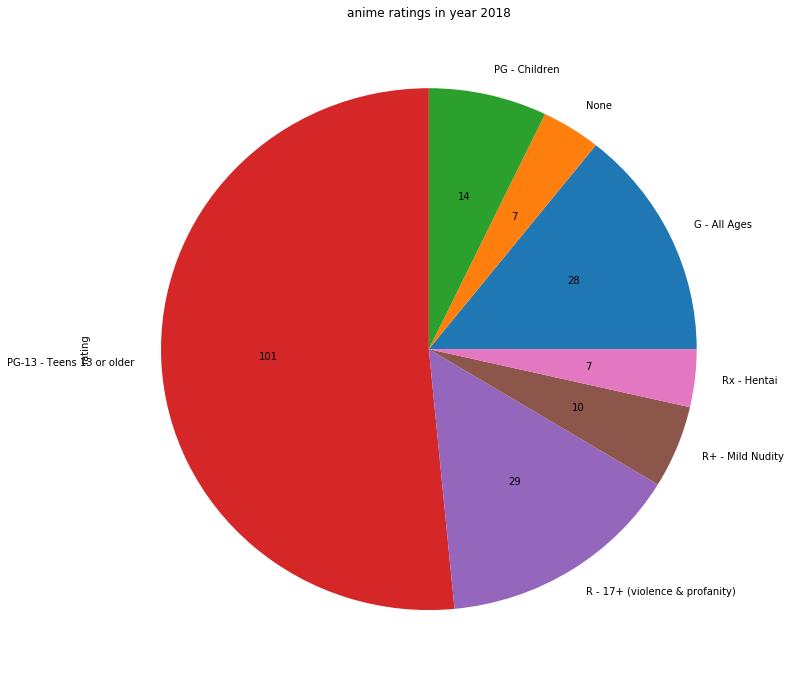

In [15]:
for year in range(2010, 2019):
    plt.title('anime ratings in year {}'.format(year))
    ratings_value_counts = animes_all[animes_all['aired_from_year'] == year]['rating'].value_counts().sort_index()
    ratings_value_counts.plot.pie(figsize=(12, 12), autopct=lambda x: int(round((x / 100) * ratings_value_counts.sum())))
    plt.savefig('graphs/ratings-piechart-year-{}'.format(year))
    plt.show()

In [12]:
animes_all[animes_all['aired_from_year'] == 2010]['rating'].value_counts()

PG-13 - Teens 13 or older         138
R+ - Mild Nudity                   40
G - All Ages                       39
R - 17+ (violence & profanity)     36
PG - Children                      21
Rx - Hentai                        18
Name: rating, dtype: int64